In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("Walmart_Cleaned.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print(df.dtypes)


Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


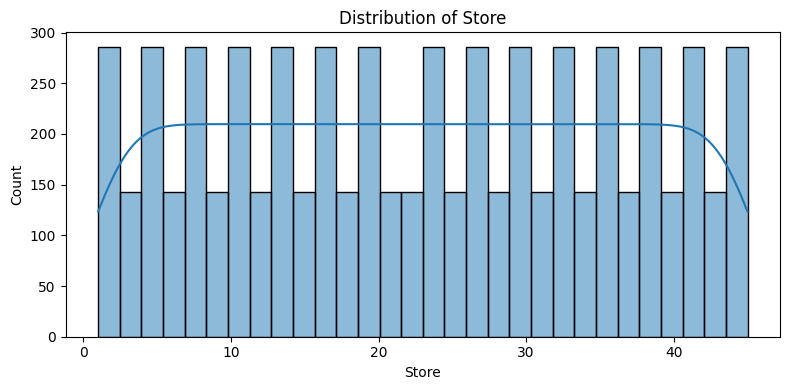

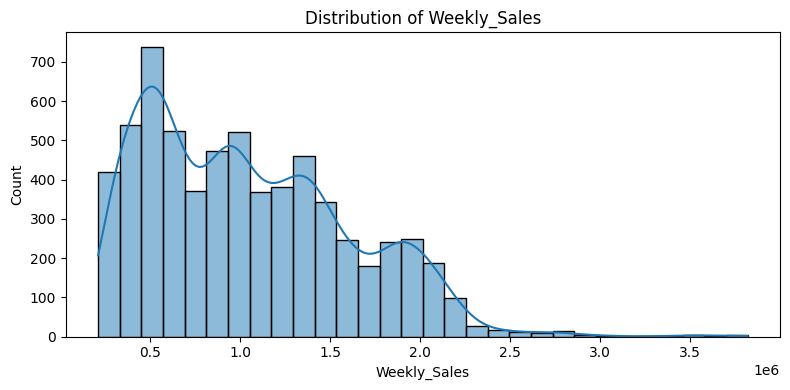

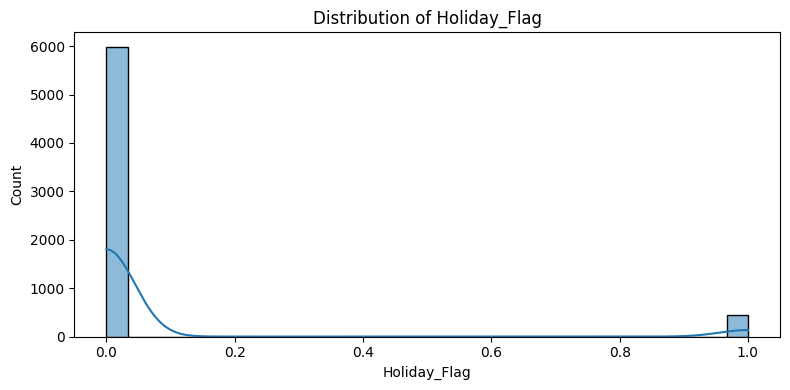

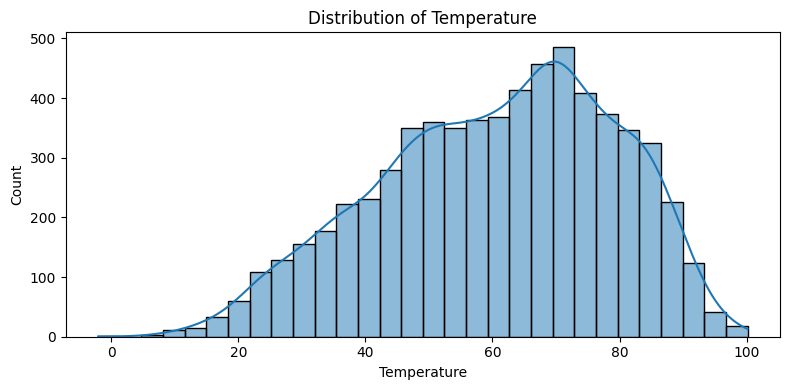

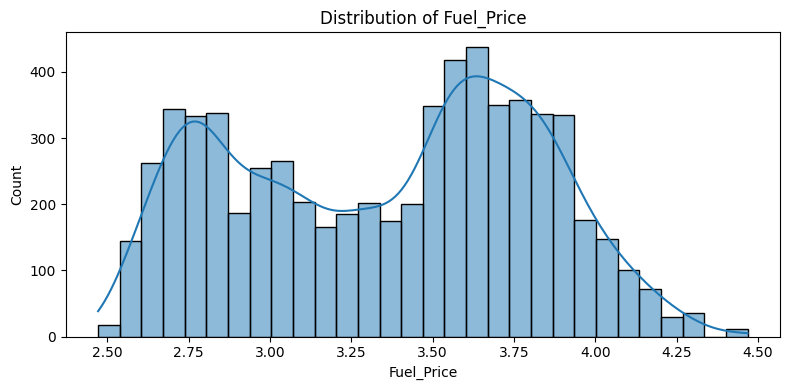

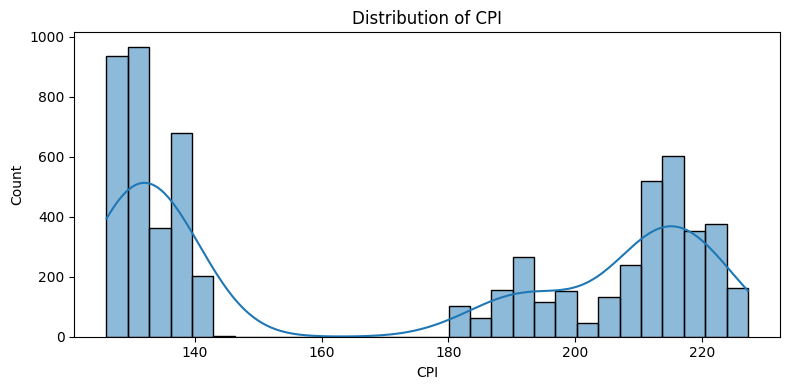

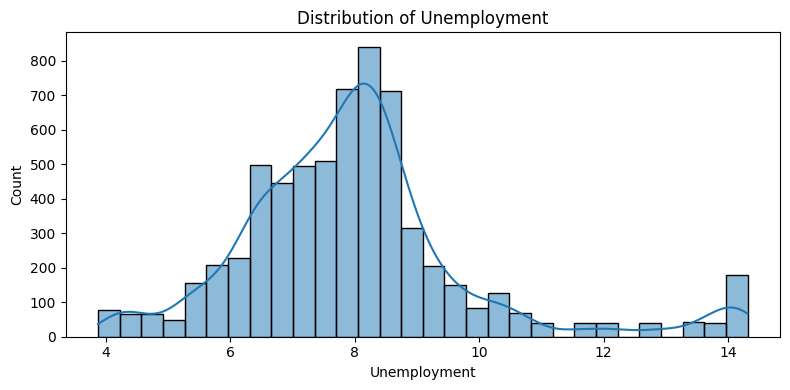

In [4]:
for col in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

1. Distribution of store is not normal because:
The histogram bars are roughly the same height across all store numbers, showing a uniform distribution rather than the bell-shaped curve typical of a normal distribution.

The KDE (blue smooth line) is relatively flat, indicating data is spread evenly rather than concentrated around a mean.

Since this is a count of stores, and stores are likely categorical or discrete with equal samples per store, the distribution should be uniform.

2. Distribution of Weekly_Sales is not normal because

The distribution is right-skewed (positive skew), with a long tail stretching towards higher sales values.

A normal distribution would be symmetric and bell-shaped, but this plot shows a clear peak on the left with a tail extending right.

This skewness indicates many weeks have lower to moderate sales, with fewer weeks having very high sales.

3. The distribution of Holiday_Flag is not normal because: 
Holiday_Flag is a binary variable (only values 0 and 1), not continuous.

The plot shows a highly imbalanced distribution, with most values at 0 (non-holidays) and very few at 1 (holidays).

Normal distributions are continuous and symmetric, which this clearly is not.

4. The distribution of Temperature shown here is approximately normal, but slightly right-skewed.

Justification:
The shape is unimodal (one peak), which is a feature of normal distribution.

It is roughly symmetric around the mean, though the right tail is a bit longer.

 Slight skewness toward higher temperatures makes it not perfectly normal.

5. Distribution of fuel price is not normal becuase:
The distribution has two visible peaks, indicating bimodality, not unimodality.

The shape is not symmetrical; it's skewed and shows multiple modes.

The KDE (kernel density estimate) line reinforces the presence of two clusters or concentrations of values.

6. Distribution of Cpi is not normal because:
The distribution is clearly bimodal — there are two separate peaks, one around ~135 and another around ~215.

There's a large gap (dip) between the two peaks (~150 to ~180), which is highly unusual for normal distributions.

The KDE curve shows a non-symmetrical, two-hump shape, confirming the bimodality.

7. Distribution of unemployment is normal because:
The shape is roughly bell-shaped.

There's a clear central peak around 8, indicating unimodality.

The data tapers off on both sides, forming a symmetric-to-slightly-skewed appearance.

In [6]:
import pandas as pd
import numpy as np

def is_continuous(series):
    # Drop NaNs
    series = series.dropna()
    
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(series):
        return False, "Non-numeric"

    unique_sorted = np.sort(series.unique())

    # Integer type: check for consecutive integers
    if np.issubdtype(series.dtype, np.integer):
        expected_range = np.arange(unique_sorted[0], unique_sorted[-1] + 1)
        is_cont = np.array_equal(unique_sorted, expected_range)
        return is_cont, "Integer sequence" if is_cont else "Gaps in integer sequence"
    
    # Float type: check if step differences are consistent
    diffs = np.round(np.diff(unique_sorted), 8)
    is_cont = np.all(diffs == diffs[0])
    return is_cont, f"Constant step of {diffs[0]}" if is_cont else "Uneven gaps in floats"

# Load your dataset
df = pd.read_csv("Walmart_Cleaned.csv")  # Replace with your actual file path

# Check continuity for all columns
results = {}
for col in df.columns:
    is_cont, reason = is_continuous(df[col])
    results[col] = {"is_continuous": is_cont, "reason": reason}

# Display results
results_df = pd.DataFrame(results).T  # Transpose for readability
print(results_df)


             is_continuous                 reason
Store                 True       Integer sequence
Date                 False            Non-numeric
Weekly_Sales         False  Uneven gaps in floats
Holiday_Flag          True       Integer sequence
Temperature          False  Uneven gaps in floats
Fuel_Price           False  Uneven gaps in floats
CPI                  False  Uneven gaps in floats
Unemployment         False  Uneven gaps in floats
